In [8]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')
N=10001
frames=1000

pert_N = 10001

file = open("Treecode_perturber_out.txt", "r")

G = int(file.readline())
time = []
x = []
y = []
z = []
vx = []
vy = []
vz = []

step = 3+3*G
i = 1
j = 0

while(True):
    line = file.readline()

    if line == "":
        file.close()
        break

    i+=1

    k = i-j*step
    if(k==3): time.append(float(line))
    elif (k>3+G and k <= 3+2*G):
        line = [float(x) for x in line.split()]
        x.append(line[0])
        y.append(line[1])
        z.append(line[2])
    elif (k>3+2*G and k <= 3+3*G):
        line = [float(x) for x in line.split()]
        vx.append(line[0])
        vy.append(line[1])
        vz.append(line[2])

    if i%step==0: j+=1

time = np.array(time)
x = np.array(x)#.reshape(len(time), G).T
y = np.array(y)#.reshape(len(time), G).T
z = np.array(z)#.reshape(len(time), G).T
vx = np.array(vx)#.reshape(len(time), G).T
vy = np.array(vy)#.reshape(len(time), G).T
vz = np.array(vz)#.reshape(len(time), G).T



In [9]:
import random
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter, PillowWriter
from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings('ignore')

norm = mpl.colors.Normalize(vmin=0, vmax=N)
cmap = mpl.colormaps.get_cmap("viridis")

scale = 30
x_min = scale
x_max = -scale
y_min = scale
y_max = -scale
z_min = scale
z_max = -scale
i=0

print(frames)
for i in tqdm(range(frames)):       #remove tqdm if you want
        
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    plt.axis([x_min, x_max, y_min, y_max, z_min, z_max])
    for j in range(N):
        if j%5==0:
            ax.scatter(x[N*i + j], y[N*i + j], z[N*i + j], color=cmap((norm(j))), alpha=0.4)

    ax.scatter(x[pert_N*i + j], y[pert_N*i + j], z[pert_N*i + j], color="red", alpha=1, marker="D")

    fig.savefig("frames/image{:04}.jpg".format(i+1))     #INSERIRE LA PROPRIA CARTELLA
    plt.close(fig)

1000


  0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter, PillowWriter
import subprocess

subprocess.run("cd frames & ffmpeg -framerate 30 -i image%4d.jpg plummer_sphere_pert.mp4", shell=True, cwd="frames", capture_output=True, text=True, input="y")


CompletedProcess(args='cd frames & ffmpeg -framerate 30 -i image%4d.jpg plummer_sphere_pert.mp4', returncode=0, stdout='', stderr="The system cannot find the path specified.\nffmpeg version 2024-03-20-git-e04c638f5f-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers\n  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)\n  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom

In [11]:
#be very carefull
import os
import glob

files = glob.glob("frames/*.jpg")        #this deletes all jpg files in a folder
for f in files:
    os.remove(f)

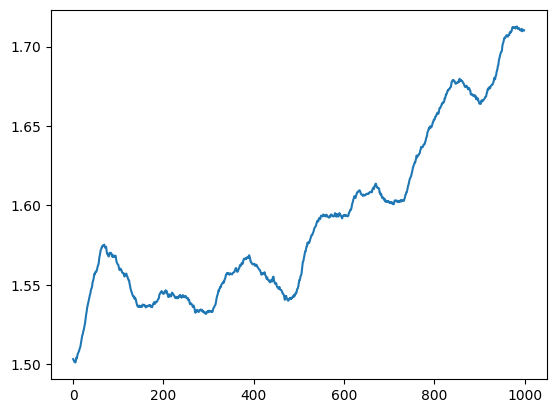

In [12]:
d = []
r = np.sqrt(x**2 + y**2 + z**2)
for i in range(frames):
    test = []
    for j in range(N):
        if r[N*i + j] < 5:
            test.append(r[N*i + j])
        
    d.append(np.mean(test))
    
plt.plot(d)